<a href="https://colab.research.google.com/github/K-3620/Keras-model/blob/main/LSTM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

from keras.models import Model,Sequential
from keras.layers import Input,Dense,LSTM,Bidirectional
from keras import backend as K
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM 

In [2]:
data = pd.read_csv('/content/drive/My Drive/데이터수집/2010년부터10년치데이터.csv',index_col=0)
data

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2010-01-04,7540,7820,7480,7520,177197,-0.007916
2010-01-05,7490,7580,7350,7500,214314,-0.002660
2010-01-06,7500,7500,7320,7350,81874,-0.020000
2010-01-07,7350,7420,7200,7210,106474,-0.019048
2010-01-08,7220,7330,7220,7240,61393,0.004161
...,...,...,...,...,...,...
2020-10-21,20200,20500,19850,20100,402212,-0.009852
2020-10-22,19850,20050,19000,19200,620779,-0.044776
2020-10-23,19500,20600,19350,19800,567794,0.031250


In [3]:
data.index

Index(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
       '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14', '2010-01-15',
       ...
       '2020-10-14', '2020-10-15', '2020-10-16', '2020-10-19', '2020-10-20',
       '2020-10-21', '2020-10-22', '2020-10-23', '2020-10-26', '2020-10-27'],
      dtype='object', name='Date', length=2669)

In [4]:
target = data['Close']

In [5]:
list(target.values)[-1]

17500

In [6]:
aa=[]

aa.extend(list(target.values[1:-1]))
aa.append('17500')

len(aa)

2668

In [7]:
len(target.values[1:-1])

2667

In [8]:
from pandas import Series

y_target= pd.DataFrame(data=aa,index=target.index[:-1],columns=['Close'])
y_target  # 그 다음날 종가로 값 설정

,Close
Date,
2010-01-04,7500
2010-01-05,7350
2010-01-06,7210
2010-01-07,7240
2010-01-08,7100
...,...
2020-10-20,20100
2020-10-21,19200
2020-10-22,19800


In [9]:
y_target.values

array([[7500],
       [7350],
       [7210],
       ...,
       [19800],
       [17100],
       ['17500']], dtype=object)

In [10]:
data[['Open','High','Low','Volume']][:-1]

,Open,High,Low,Volume
Date,,,,
2010-01-04,7540,7820,7480,177197
2010-01-05,7490,7580,7350,214314
2010-01-06,7500,7500,7320,81874
2010-01-07,7350,7420,7200,106474
2010-01-08,7220,7330,7220,61393
...,...,...,...,...
2020-10-20,20850,21600,19850,745574
2020-10-21,20200,20500,19850,402212
2020-10-22,19850,20050,19000,620779


In [11]:
x_data = data[['Open','High','Low','Volume']][:-1] # 학습
y_data = y_target # 답

In [12]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler

x_datas = StandardScaler().fit_transform(x_data)
y_datas = StandardScaler().fit_transform(y_data)

In [13]:
# 데이터 분리하기
x_train = x_datas[:2160]
x_test = x_datas[2160:]

y_train = y_datas[:2160]
y_test = y_datas[2160:]

In [14]:
y_train.shape

(2160, 1)

In [15]:
x_train.shape

(2160, 4)

In [16]:
x_train = x_train.reshape((2160,-1,4))

In [17]:
x_train.ndim

3

In [18]:
x_test.shape

(508, 4)

In [19]:
x_test = x_test.reshape((508,-1,4))
# y_test = y_test.reshape((509,-1,1))

In [20]:
x_test.shape,y_test.shape

((508, 1, 4), (508, 1))

In [21]:
# 모델 구성
model = Sequential()

# model.add(Dense(units=1024, input_dim=4, activation='relu'))
# model.add(Dense(units=512, activation='relu'))
# model.add(Dense(units=256, activation='relu'))
# model.add(Dense(units=128, activation='relu'))
# model.add(Dense(units=64, activation='relu'))
# model.add(Dense(units=32, activation='relu'))
# model.add(Dense(units=1))

model.add(LSTM(
    64
    ,input_shape=(x_train.shape[1],x_train.shape[2])
    ,activation='relu'
    ,return_sequences = False
    ))
# model.add(Dense(32,activation='relu'))
# model.add(Dense(16,activation='relu'))
# model.add(Dense(8,activation='relu'))
model.add(Dense(1))

In [22]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])

In [24]:
from keras.callbacks import EarlyStopping
# es = EarlyStopping(patience=1)
es = EarlyStopping(monitor='loss',patience=2,verbose=1)
hist = model.fit(x_train,y_train,epochs=150,batch_size=16,callbacks=[es],shuffle=False)

Epoch 1/150
135/135 [==============================] - 0s 1ms/step - loss: 0.2393 - mae: 0.4281
Epoch 2/150
135/135 [==============================] - 0s 1ms/step - loss: 0.0123 - mae: 0.0827
Epoch 3/150
135/135 [==============================] - 0s 1ms/step - loss: 0.0051 - mae: 0.0504
Epoch 4/150
135/135 [==============================] - 0s 2ms/step - loss: 0.0045 - mae: 0.0462
Epoch 5/150
135/135 [==============================] - 0s 2ms/step - loss: 0.0044 - mae: 0.0454
Epoch 6/150
135/135 [==============================] - 0s 1ms/step - loss: 0.0042 - mae: 0.0444
Epoch 7/150
135/135 [==============================] - 0s 1ms/step - loss: 0.0042 - mae: 0.0437
Epoch 8/150
135/135 [==============================] - 0s 1ms/step - loss: 0.0041 - mae: 0.0431
Epoch 9/150
135/135 [==============================] - 0s 2ms/step - loss: 0.0040 - mae: 0.0428
Epoch 10/150
135/135 [==============================] - 0s 2ms/step - loss: 0.0040 - mae: 0.0425
Epoch 11/150
135/135 [=================

In [25]:
res = model.evaluate(x_test,y_test,batch_size=16)

32/32 [==============================] - 0s 1ms/step - loss: 0.7425 - mae: 0.3552


In [26]:
y_hat = model.predict(x_test)

In [ ]:
x_test.shape,y_hat.shape,y_test.shape

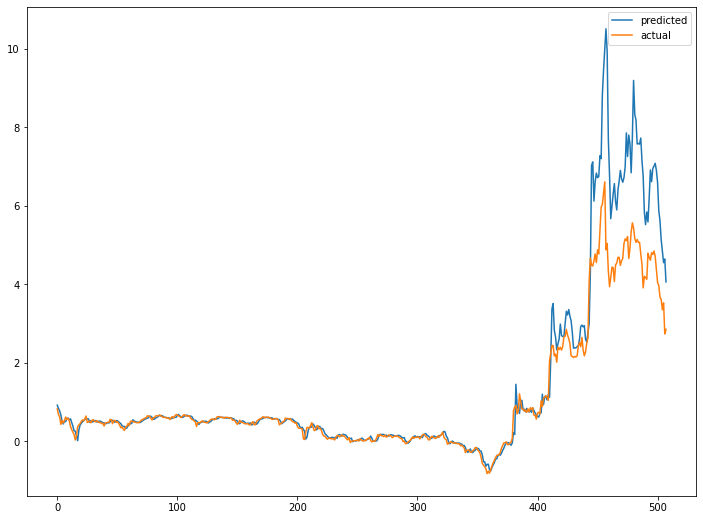

In [27]:
plt.figure(figsize=(12,9))
plt.plot(y_hat, label = "predicted")
plt.plot(y_test,label = "actual")
plt.legend()
plt.show()

In [ ]:
## 그 다음날 종가를 답으로 정해놓고 예측을 하였을때 예측 성능이 많이 떨어지는것을 확인을 할 수가있다